# Condensación Bosónica no convencional de Bose-Einstein

$$
\rho_{0} = \frac{1}{V} \frac{\sum_{n=1}^\infty = ne^{\beta\{(- \lambda + \mu + \frac{\gamma}{V})n - \frac{\gamma}{V}n^{2}\}}}{\sum_{n=0}^\infty = e^{\beta\{(- \lambda + \mu + \frac{\gamma}{V})n - \frac{\gamma}{V}n^{2}\}}} \quad \sim \quad (\frac{\mu - \lambda}{2 \gamma})
$$

### Parametros

__γ__ : Término denominado de selfscattering.

__β__ : Temeperatura inversa.

__λ__ : Energía del estado fundamental.

__µ__ : Potencial químico.

__V__ : Volumen del sistema.

__N__ : Número de partículas en el sistema. 

### Condiciones

$0 < γ,β,V, N$

$λ < µ < 0 $

$\lim_{V,N \to \infty }\frac{N}{V}=cte$

## *Desarrollo*

### Dependencias

In [13]:
import math
import matplotlib.pyplot as plt
import time
import sys

$$
f_{1} = \sum_{n=1}^\infty = ne^{\beta\{(- \lambda + \mu + \frac{\gamma}{V})n - \frac{\gamma}{V}n^{2}\}}
$$

In [2]:
def f1(b , u , lam , gam , v , N):
    sumatoria = 0
    
    for n in range(1, N):
        try:
            sumatoria+=n*math.exp(b*((-lam+u+(gam/v))*n-(gam/v)*math.pow(n, 2)))
        except OverflowError:
            print ("Desbordamiento")
            break
        
    return sumatoria

$$
f_{2} = \sum_{n=0}^\infty = e^{\beta\{(- \lambda + \mu + \frac{\gamma}{V})n - \frac{\gamma}{V}n^{2}\}}
$$

In [7]:
def f2(b , u , lam , gam , v , N):
    sumatoria = 0
    
    for n in range(N):
        try:
            sumatoria+=math.exp(b*((-lam+u+(gam/v))*n-(gam/v)*math.pow(n, 2)))
        except OverflowError:
            print ("Desbordamiento")
            break
            
    return sumatoria

### Obtención de *ρ*

$$
\rho_{0} = \frac{1}{V} * \frac{f_{1}}{f_{2}}
$$

In [6]:
def calculo_ro(b , u , lam , gam , v , n):
    try:
        numerador =  f1(B, U, lam, gam, V, N)
        denominador = f2(B, U, lam, gam, V, N)
        fraccion1 = 1/v
        fraccion2 = numerador/denominador
        ro = fraccion1 * fraccion2
        print ("Numerador: ",numerador)
        print ("Denominador: ",denominador)
        print ("fraccion 1: ",fraccion1)
        print ("fraccion 2: ",fraccion2)
        print ("Ro: ",ro)
        
    except ZeroDivisionError:
        print('Division por cero')
        ro = 0
        
    print ("Valor ro: ",ro)
    return ro

### Obtención *validador*
$$
\frac{\mu - \lambda}{2 \gamma} 
$$

In [5]:
def calculo_validador(u , lam , gam):
    try:
        resultado = (u-lam)/(2*gam)
    except ZeroDivisionError:
        print('Division por cero')
        resultado = 0
        
    print ("Valor validador: ",resultado)    
    return resultado

### Generador vector V's
$$
V = \frac{N}{cte}
$$

In [2]:
def generador_v(vector_n, constante):

    """ Genera un vector de V's a partir de un vector de N's y una constante"""

    v = []

    for x in range(len(vector_n)):
        nv = vector_n[x] / constante
        v.append(nv)

    print("valores n: ", vector_n)
    print("valores v: ", v)

    return v

### Generador vector N's
$$
N = V * cte
$$

In [4]:
def generador_n(vector_v, constante):

    """ Genera un vector de N's a partir de un vector de V's y una constante"""

    n = []

    for x in range(len(vector_v)):
        nn = vector_v[x] * constante
        n.append(nn)

    print("valores v: ", vector_v)
    print("valores n: ", n)

    return n

### Graficador

In [5]:
def graficador(datos_x,datos_y,titulo,titulo_x,titulo_y,ajuste_ejes=False):
    if len(datos_x)!=0 or len(datos_y)!=0:
        
        # Informacion grafico
        plt.title(titulo)
        plt.xlabel(titulo_x)
        plt.ylabel(titulo_y)
        
        if ajustes_ejes:
            # Limites grafico
            minimo_x = min(datos_x) - 1
            maximo_x = max(datos_x) + 1
            minimo_y = min(datos_y) - 1
            maximo_y = max(datos_y) + 1
            plt.xlim(minimo_x,maximo_x)
            plt.ylim(minimo_y,maximo_y)
        
        # Mostrar datos
        plt.plot(datos_x, datos_y, 'ro')
        plt.show()
    else:
        print("Vector vacio")

## *Experimentos*

## *Pruebas de modulos y otros*

In [6]:
# Valores iniciales
B = 15      # Positivo
U = -0.05   # Menor que cero
lam = -0.3  # Menor que mu
gam = 50    # Positivo

# V Valor muy grande
# N Numero total de particulas

configuracion = [B, U, lam, gam]

vect_n = [100, 250, 380, 490, 550]
nv = generador_v(vect_n, 0.5)

# experimento(configuracion, nv, vect_n)

vect_v = [70, 84, 96, 102, 158]
nn = generador_n(vect_v, 500)

# experimento(configuracion, vect_v, nn)


valores n:  [100, 250, 380, 490, 550]
valores v:  [200.0, 500.0, 760.0, 980.0, 1100.0]
valores v:  [70, 84, 96, 102, 158]
valores n:  [35000, 42000, 48000, 51000, 79000]


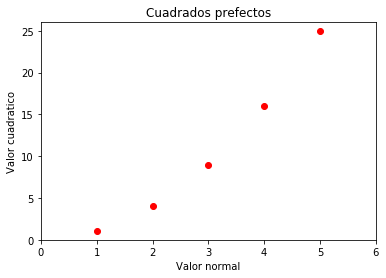

In [91]:
#Prueba de graficador
graficador([1,2,3,4,5],[1,4,9,16,25],"Cuadrados prefectos","Valor normal","Valor cuadratico")

In [92]:
def argumento(b , u , lam , gam , v , n):
    return b*((-lam+u+(gam/v))*n-(lam/v)*math.pow(n, 2))

In [93]:
result=argumento(B,U,lam,gam,V,N)
print (result)

-524.5200000000002


In [94]:
math.exp(result)

1.599036407710311e-228

In [95]:
math.log(sys.float_info.max)

709.782712893384

In [96]:
sys.float_info.max

1.7976931348623157e+308

In [97]:
math.exp(math.log(sys.float_info.max))

1.7976931348622732e+308

http://stackoverflow.com/questions/4050907/python-overflowerror-math-range-error

https://docs.python.org/3.6/library/math.html